In [11]:
# Importing the necessary libraries 
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

print("Import Successful")

Import Successful


In [12]:
# Set the working directory to where the dataset resides
os.chdir("F:\Python_Edureka\projects\Project_1")

# Verify the set working directory
os.getcwd()

'F:\\Python_Edureka\\projects\\Project_1'

In [13]:
# Read the OnlineNewsPopularity.csv file in a Pandas DataFrame
social_data = pd.read_csv("OnlineNewsPopularity.csv")

# Display the first five rows
social_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [14]:
social_data = social_data.drop(columns = ["url"])
social_data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [15]:
social_data.shape

(39644, 60)

In [16]:
# Checking for Null values in the data
social_data.isnull().values.any()

False

In [17]:
# import pandas_profiling
# pandas_profiling.ProfileReport(social_data)

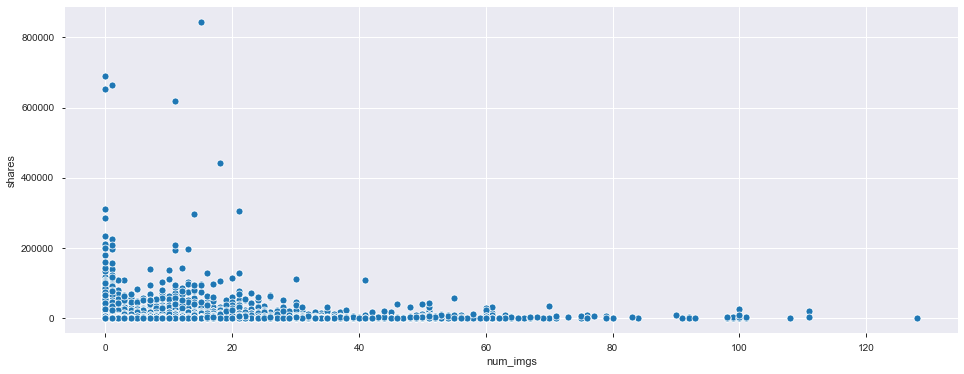

In [18]:
plt.figure(figsize = (16, 6))
ax = sns.scatterplot(x = "num_imgs", y = "shares", data = social_data)

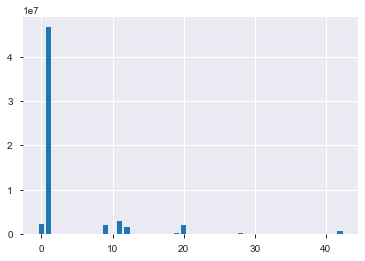

In [19]:
# Analysing how the number of images is affecting the target variable shares
social_data["SumofImages"] = social_data.groupby('num_imgs')["shares"].sum()
plt.bar(social_data["num_imgs"], social_data["SumofImages"])
plt.show()

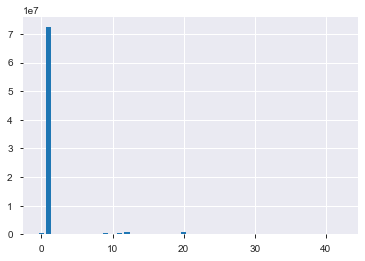

In [20]:
# Analysing how the number of videos count is affecting the target variable shares
social_data["SumofVideos"] = social_data.groupby('num_videos')["shares"].sum()
plt.bar(social_data["num_imgs"], social_data["SumofVideos"])
plt.show()

In [21]:
# Exploratory Data Analysis using Pandas Profiling
import pandas_profiling
pandas_profiling.ProfileReport(social_data)

I:\anaconda\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,62
Number of observations,39644
Total Missing (%),3.2%
Total size in memory,18.8 MiB
Average record size in memory,496.0 B
Numeric,45
Categorical,0
Boolean,14
Date,0
Text (Unique),0
Rejected,3


In [22]:
# Deleting highly correlated columns from the data frame
correlated_colunms_to_be_dropped = ["n_non_stop_words", "n_non_stop_unique_tokens", "kw_avg_min", "SumofVideos", "SumofImages"]
social_data = social_data.drop(correlated_colunms_to_be_dropped, axis = 1)
print(social_data.shape)
social_data.head()

(39644, 57)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,3.0,1.0,1.0,0.0,4.393365,6.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,19.0,19.0,20.0,0.0,4.682836,7.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [23]:
# Splitting the data into features(X) and labels(Y)
X = social_data.iloc[:, :-1].values
y = social_data.iloc[:, -1].values

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
# Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [26]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
model = clf.fit(X_train, y_train)

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn import metrics
metrics.mean_squared_error(y_pred, y_test)

197231984.40681478